# Zylentrix Data Analyst Intern Assesement

## Step 1. Import Important Library

In [618]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fpdf import FPDF

## Step 2. Load Students Data

In [621]:
student_df=pd.read_csv("students.csv")

In [623]:
student_df.shape

(100, 6)

In [625]:
student_df.sample(20)

,Student_ID,Name,Age,Gender,Location,Enrolment_Date
96,S097,Student_97,31,Other,Chennai,13/10/2023
91,S092,Student_92,20,Male,Chennai,25/08/2023
2,S003,Student_3,28,Other,Mumbai,13/01/2023
98,S099,Student_99,18,Male,Kolkata,17/12/2023
72,S073,Student_73,25,Other,Bangalore,21/08/2023
40,S041,Student_41,21,Female,Kolkata,22/02/2023
88,S089,Student_89,20,Other,Chennai,01/10/2023
20,S021,Student_21,32,Other,Delhi,14/01/2023
4,S005,Student_5,24,Other,Delhi,06/05/2023
79,S080,Student_80,26,Other,Bangalore,10/12/2023


## Step 3. Data Cleaning and Preprocessing

 ### 3.1 Trim Whitespace in String Columns

In [629]:
student_df[['Student_ID', 'Name', 'Gender', 'Location']] = student_df[['Student_ID', 'Name', 'Gender', 'Location']].apply(lambda x: x.str.strip())


### 3.2 Standardize Text Case

In [632]:
student_df['Gender'] = student_df['Gender'].str.title()      # 'female', 'FEMALE' → 'Female'
student_df['Location'] = student_df['Location'].str.title()  # 'kolkata' → 'Kolkata'


### 3.3 Convert and clean Enrolment_Date to DateTime

In [635]:
student_df['Enrolment_Date'] = pd.to_datetime(student_df['Enrolment_Date'], dayfirst=True)


### 3.4 Check for Duplicates

In [638]:
student_df.duplicated().sum()  # If > 0, remove them
student_df.drop_duplicates(inplace=True)


### 3.5 Check for Missing Values

In [641]:

student_df.isnull().sum()


Student_ID        0
Name              0
Age               0
Gender            0
Location          0
Enrolment_Date    0
dtype: int64

In [643]:
student_df.drop_duplicates()

,Student_ID,Name,Age,Gender,Location,Enrolment_Date
0,S001,Student_1,24,Female,Kolkata,2023-11-24
1,S002,Student_2,32,Other,Chennai,2023-02-27
2,S003,Student_3,28,Other,Mumbai,2023-01-13
3,S004,Student_4,25,Female,Bangalore,2023-05-21
4,S005,Student_5,24,Other,Delhi,2023-05-06
...,...,...,...,...,...,...
95,S096,Student_96,32,Other,Chennai,2023-12-19
96,S097,Student_97,31,Other,Chennai,2023-10-13
97,S098,Student_98,20,Other,Kolkata,2023-04-23
98,S099,Student_99,18,Male,Kolkata,2023-12-17


### 3.6 Get the Data Information

In [646]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Student_ID      100 non-null    object        
 1   Name            100 non-null    object        
 2   Age             100 non-null    int64         
 3   Gender          100 non-null    object        
 4   Location        100 non-null    object        
 5   Enrolment_Date  100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.8+ KB


In [648]:
student_df['Age'].describe()


count    100.000000
mean      25.480000
std        4.835642
min       18.000000
25%       21.000000
50%       25.000000
75%       29.000000
max       34.000000
Name: Age, dtype: float64

### 3.7 Ensure Consistent Age Format

In [651]:
student_df['Gender'] = student_df['Gender'].str.strip().str.title()
student_df['Location'] = student_df['Location'].str.strip().str.title()


In [653]:
student_df.sample(20)

,Student_ID,Name,Age,Gender,Location,Enrolment_Date
97,S098,Student_98,20,Other,Kolkata,2023-04-23
74,S075,Student_75,20,Other,Delhi,2023-07-06
45,S046,Student_46,27,Male,Bangalore,2023-06-26
64,S065,Student_65,18,Other,Kolkata,2023-12-05
94,S095,Student_95,22,Other,Delhi,2023-11-24
57,S058,Student_58,33,Male,Bangalore,2023-11-13
75,S076,Student_76,18,Male,Chennai,2023-03-25
90,S091,Student_91,25,Female,Bangalore,2023-03-25
37,S038,Student_38,20,Female,Mumbai,2023-03-21
53,S054,Student_54,32,Other,Chennai,2023-02-10


### 3.8 Categorical Type Conversion (Optional)

In [656]:
student_df['Gender'] = student_df['Gender'].astype('category')
student_df['Location'] =student_df['Location'].astype('category')


In [658]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Student_ID      100 non-null    object        
 1   Name            100 non-null    object        
 2   Age             100 non-null    int64         
 3   Gender          100 non-null    category      
 4   Location        100 non-null    category      
 5   Enrolment_Date  100 non-null    datetime64[ns]
dtypes: category(2), datetime64[ns](1), int64(1), object(2)
memory usage: 3.8+ KB


# COURSE_ACTIVITY Data Analysis

## Step 1. Load Course Activity Dataset

In [663]:
course_df=pd.read_csv("course_activity.csv")

In [665]:
course_df.shape

(659, 5)

In [667]:
course_df.sample(10)

,Student_ID,Course_ID,Date,Time_Spent_Minutes,Completion_Percentage
471,S069,UX303,10/03/2024,100,70.83
66,S011,PY202,10/03/2024,19,85.11
418,S062,WD404,29/02/2024,142,41.01
580,S088,PY202,11/01/2024,137,86.08
64,S011,UX303,21/01/2024,123,59.65
332,S050,PY202,31/03/2024,122,99.19
440,S066,PY202,11/02/2024,157,74.90
221,S033,PY202,08/03/2024,115,60.93
361,S054,WD404,12/01/2024,66,83.50
46,S007,PY202,09/01/2024,162,16.12


## Step 2. Data Cleaning and Preprocessing

### 2.1 Trim Whitespace in String Columns


In [671]:
course_df[['Student_ID', 'Course_ID']] = course_df[['Student_ID', 'Course_ID']].apply(lambda x: x.str.strip())



### 2.2 Standardize Text Case

In [674]:
course_df['Student_ID'] = course_df['Student_ID'].str.upper()
course_df['Course_ID'] = course_df['Course_ID'].str.upper()


In [676]:
course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             659 non-null    object 
 1   Course_ID              659 non-null    object 
 2   Date                   659 non-null    object 
 3   Time_Spent_Minutes     659 non-null    int64  
 4   Completion_Percentage  659 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 25.9+ KB


### 2.3 Convert and clean Enrolment_Date to DateTime

In [679]:
course_df['Date'] = pd.to_datetime(course_df['Date'], dayfirst=True)


### 2.4 Check for Duplicates

In [682]:
course_df.duplicated().sum()  # Check how many
course_df.drop_duplicates(inplace=True)


In [684]:
course_df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
654    False
655    False
656    False
657    False
658    False
Length: 659, dtype: bool

### 2.4 Check for Missing Values¶

In [687]:
course_df.isnull().sum()


Student_ID               0
Course_ID                0
Date                     0
Time_Spent_Minutes       0
Completion_Percentage    0
dtype: int64

In [689]:
course_df['Time_Spent_Minutes'].describe()


count    659.000000
mean      98.113809
std       49.045548
min       10.000000
25%       58.000000
50%       98.000000
75%      139.000000
max      180.000000
Name: Time_Spent_Minutes, dtype: float64

In [691]:
course_df['Completion_Percentage'].describe()

count    659.000000
mean      54.778710
std       26.289156
min       10.150000
25%       32.070000
50%       53.450000
75%       77.560000
max      100.000000
Name: Completion_Percentage, dtype: float64

### 2.5 Categorical Type Conversion (Optional)


In [694]:
course_df['Student_ID'] = course_df['Student_ID'].astype('category')
course_df['Course_ID'] = course_df['Course_ID'].astype('category')


In [696]:
course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Student_ID             659 non-null    category      
 1   Course_ID              659 non-null    category      
 2   Date                   659 non-null    datetime64[ns]
 3   Time_Spent_Minutes     659 non-null    int64         
 4   Completion_Percentage  659 non-null    float64       
dtypes: category(2), datetime64[ns](1), float64(1), int64(1)
memory usage: 21.9 KB


# FEEDBACK Data Analysis

## Step 1. Load Activity Dataset

In [701]:
feedback_df=pd.read_csv("feedback.csv")

In [703]:
feedback_df.sample(10)

,Student_ID,Course_ID,Rating,Feedback_Text
36,S034,PY202,1,Very helpful
31,S014,UX303,2,Excellent instructor
33,S039,DM101,5,Too fast-paced
78,S067,DM101,5,Excellent instructor
38,S056,UX303,4,Loved the examples
37,S023,PY202,1,Excellent instructor
8,S005,DM101,4,Loved the examples
41,S090,DM101,3,Well structured
54,S040,DM101,5,Too fast-paced
34,S092,WD404,3,Well structured


In [705]:
feedback_df.shape

(80, 4)

## Step 2. Data Cleaning and Preprocessing

### 2.1 Trim Whitespace in String Columns¶

In [709]:
qf[['Student_ID', 'Course_ID']] = qf[['Student_ID', 'Course_ID']].apply(lambda x: x.str.strip())

### 2.2 Standardize Text Case

In [712]:
pf['Student_ID'] = pf['Student_ID'].str.upper()
pf['Course_ID'] = pf['Course_ID'].str.upper()

### 2.3 Check for duplications

In [715]:
feedback_df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
75    False
76    False
77    False
78    False
79    False
Length: 80, dtype: bool

### 2.4 Check for null or missing values

In [718]:
feedback_df.isnull().sum()

Student_ID       0
Course_ID        0
Rating           0
Feedback_Text    0
dtype: int64

In [720]:
feedback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Student_ID     80 non-null     object
 1   Course_ID      80 non-null     object
 2   Rating         80 non-null     int64 
 3   Feedback_Text  80 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.6+ KB


In [722]:
feedback_df['Student_ID'] = feedback_df['Student_ID'].astype('category')
feedback_df['Course_ID'] = feedback_df['Course_ID'].astype('category')

# E. Exploratory Data Analysis(EDA)

### E.1 Locationwise Number of Students

In [413]:
location_counts = student_df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Total_Students']

In [415]:
print(location_counts)

    Location  Total_Students
0  Bangalore              26
1    Chennai              25
2      Delhi              25
3    Kolkata              13
4     Mumbai              11


### E.2 Genderwise Student In Each Location

In [417]:
gender_location_counts = student_df.groupby(['Location', 'Gender'], observed=True).size().reset_index(name='Total_Students')


In [419]:
print(gender_location_counts)

     Location  Gender  Total_Students
0   Bangalore  Female               8
1   Bangalore    Male              11
2   Bangalore   Other               7
3     Chennai  Female               4
4     Chennai    Male              11
5     Chennai   Other              10
6       Delhi  Female               9
7       Delhi    Male               5
8       Delhi   Other              11
9     Kolkata  Female               5
10    Kolkata    Male               4
11    Kolkata   Other               4
12     Mumbai  Female               4
13     Mumbai    Male               3
14     Mumbai   Other               4


### E.3 Student Per Age Range

In [614]:


# Clean the Age column just in case
df['Age'] = pd.to_numeric(student_df['Age'], errors='coerce')

# Define age bins and labels
bins = [0, 17, 25, 35, 50, 100]
labels = ['0–17', '18–25', '26–35', '36–50', '50+']

# Create a new column for Age Group
student_df['Age_Group'] = pd.cut(student_df['Age'], bins=bins, labels=labels, right=True)

# Count students in each age group
age_group_counts = student_df['Age_Group'].value_counts().sort_index().reset_index()
age_group_counts.columns = ['Age_Group', 'Total_Students']

print(age_group_counts)

  Age_Group  Total_Students
0      0–17               0
1     18–25              53
2     26–35              47
3     36–50               0
4       50+               0


### E.4 Total number of courses

In [424]:
total_courses = course_df['Course_ID'].nunique()

print(f"Total number of courses: {total_courses}")

Total number of courses: 4


### E.5 Student Per Course

In [610]:
# Count unique students per course
students_per_course = course_df.groupby('Course_ID',observed=True)['Student_ID'].nunique().reset_index()
students_per_course.columns = ['Course_ID', 'Total_Students']

print(students_per_course)

  Course_ID  Total_Students
0     DM101              82
1     PY202              88
2     UX303              82
3     WD404              76


### E.6 What is the overall average completion rate across courses?

In [429]:
overall_avg_completion = course_df['Completion_Percentage'].mean()


In [431]:
print(overall_avg_completion)

54.77871016691957


### E.7 What is the average completion rate for each courses?

In [608]:
# Group by Course_ID and calculate average completion
avg_completion = course_df.groupby('Course_ID',observed=True)['Completion_Percentage'].mean().reset_index()
avg_completion.columns = ['Course_ID', 'Average_Completion_Rate']

print(avg_completion)

  Course_ID  Average_Completion_Rate
0     DM101                52.619874
1     PY202                56.104329
2     UX303                56.159172
3     WD404                54.135329


### E.8 Which course has the highest and lowest average engagement time?

In [436]:
engagement_by_course = course_df.groupby('Course_ID',observed=True)['Time_Spent_Minutes'].mean().sort_values()
highest = engagement_by_course.idxmax()
lowest = engagement_by_course.idxmin()


In [438]:
highest

'DM101'

In [440]:
lowest

'PY202'

### E.9  How does engagement differ by age group or location?

In [442]:
bins = [0, 18, 25, 35, 50, 100]
labels = ['<18', '18–25', '26–35', '36–50', '50+']
student_df['Age_Group'] = pd.cut(student_df['Age'], bins=bins, labels=labels)

merged = course_df.merge(df, on='Student_ID')
Age_group_Engagement=merged.groupby('Age_Group', observed=True)['Time_Spent_Minutes'].mean()
Location_Engangement=merged.groupby('Location', observed=True)['Time_Spent_Minutes'].mean()



In [444]:
Location_Engangement

Location
Bangalore     98.000000
Chennai       90.946746
Delhi        103.302857
Kolkata      104.384615
Mumbai        95.435484
Name: Time_Spent_Minutes, dtype: float64

In [535]:
Age_group_Engagement

Age_Group
<18      107.102041
18–25     99.675958
26–35     95.362229
Name: Time_Spent_Minutes, dtype: float64

### E.10  What is the average feedback rating per course?

In [446]:
Avg_feedback_per_course=feedback_df.groupby('Course_ID')['Rating'].mean()


C:\Users\hp\AppData\Local\Temp\ipykernel_26120\288965069.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Avg_feedback_per_course=feedback_df.groupby('Course_ID')['Rating'].mean()


In [448]:
Avg_feedback_per_course

Course_ID
DM101    2.900000
PY202    3.277778
UX303    2.923077
WD404    2.789474
Name: Rating, dtype: float64

### E.11  Correlation between completion rate and feedback rating?

In [450]:
merged = course_df.merge(feedback_df, on=['Student_ID', 'Course_ID'])
correlation=merged[['Completion_Percentage', 'Rating']].corr()


In [452]:
correlation

,Completion_Percentage,Rating
Completion_Percentage,1.000000,-0.051708
Rating,-0.051708,1.000000


### E.12  Identify top 3 student segments based on engagement and satisfaction

In [454]:
full_df = student_df.merge(course_df, on='Student_ID').merge(feedback_df, on=['Student_ID', 'Course_ID'])
segment_scores = full_df.groupby(['Age_Group', 'Location'], observed=True)[['Time_Spent_Minutes', 'Rating']].mean()



In [456]:
segment_scores

Time_Spent_Minutes    Rating
Age_Group Location                               
<18       Bangalore           78.000000  2.000000
          Chennai             94.000000  5.000000
          Kolkata            113.666667  4.666667
18–25     Bangalore          126.071429  2.642857
          Chennai             95.277778  4.000000
          Delhi               88.266667  1.866667
          Kolkata            113.200000  1.600000
          Mumbai             117.333333  3.666667
26–35     Bangalore           98.666667  3.916667
          Chennai             80.083333  4.250000
          Delhi              117.500000  2.450000
          Kolkata             95.000000  2.800000
          Mumbai              86.250000  2.250000

# V. Visualizations

In [458]:
# Merge for joint analysis
merged_df = pd.merge(course_df,student_df, on='Student_ID', how='left')


### V.1 Avg Time Spent Per Course

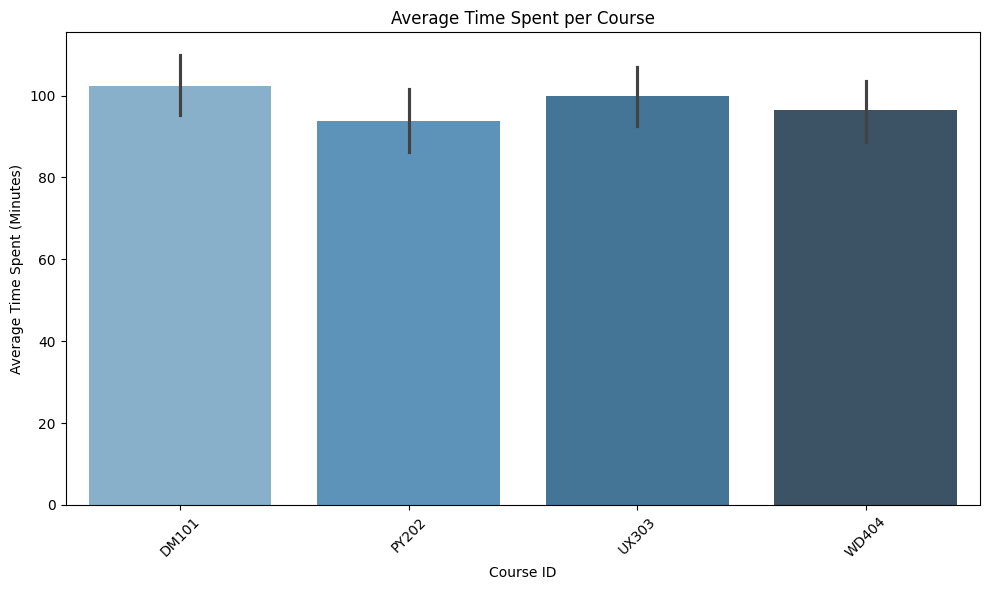

In [461]:
plt.figure(figsize=(10,6))
sns.barplot(data=merged_df, x='Course_ID', y='Time_Spent_Minutes', 
            estimator='mean', hue='Course_ID', palette='Blues_d', legend=False)
plt.title("Average Time Spent per Course")
plt.xlabel("Course ID")
plt.ylabel("Average Time Spent (Minutes)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("my_plot_1.png", bbox_inches='tight')
plt.show()



### V.2 Box plot: Time Spent by Age Group

C:\Users\hp\AppData\Local\Temp\ipykernel_26120\682748912.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Age_Group', y='Time_Spent_Minutes', palette='coolwarm')


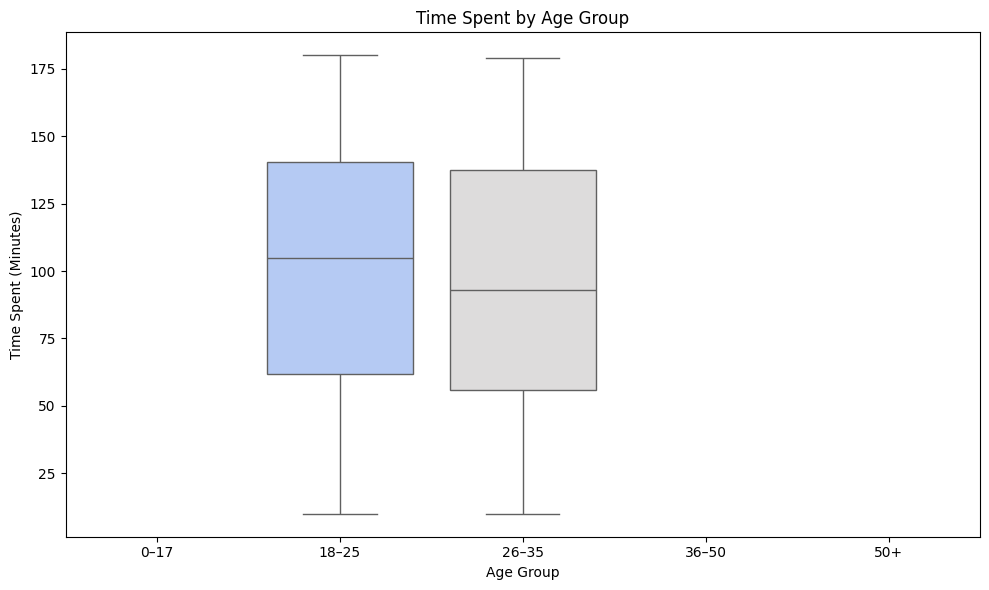

In [463]:
# Age Group creation
bins = [0, 17, 25, 35, 50, 100]
labels = ['0–17', '18–25', '26–35', '36–50', '50+']
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=bins, labels=labels, right=True)

plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='Age_Group', y='Time_Spent_Minutes', palette='coolwarm')
plt.title("Time Spent by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Time Spent (Minutes)")
plt.tight_layout()
plt.savefig("my_plot_2.png", bbox_inches='tight')
plt.show()

### V.3  Average Time Spent by Location and Gender

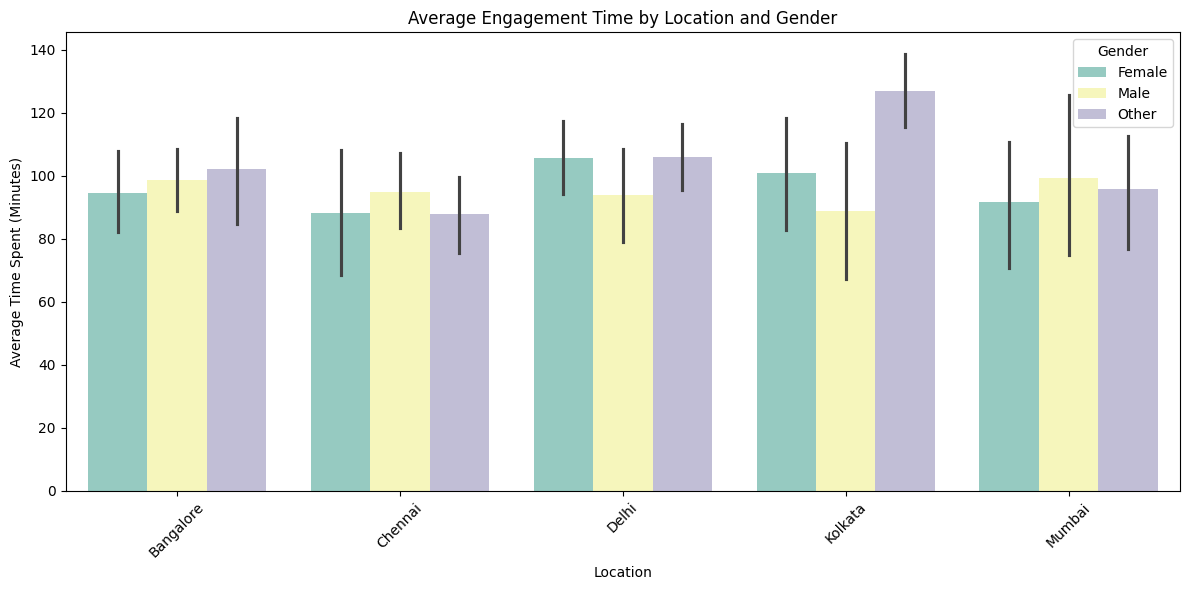

In [465]:
plt.figure(figsize=(12,6))
sns.barplot(data=merged_df, x='Location', y='Time_Spent_Minutes', hue='Gender', 
            estimator='mean', palette='Set3')
plt.title("Average Engagement Time by Location and Gender")
plt.xlabel("Location")
plt.ylabel("Average Time Spent (Minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("my_plot_3.png", bbox_inches='tight')
plt.show()

### V.4 Average Time Spent by Course and Location

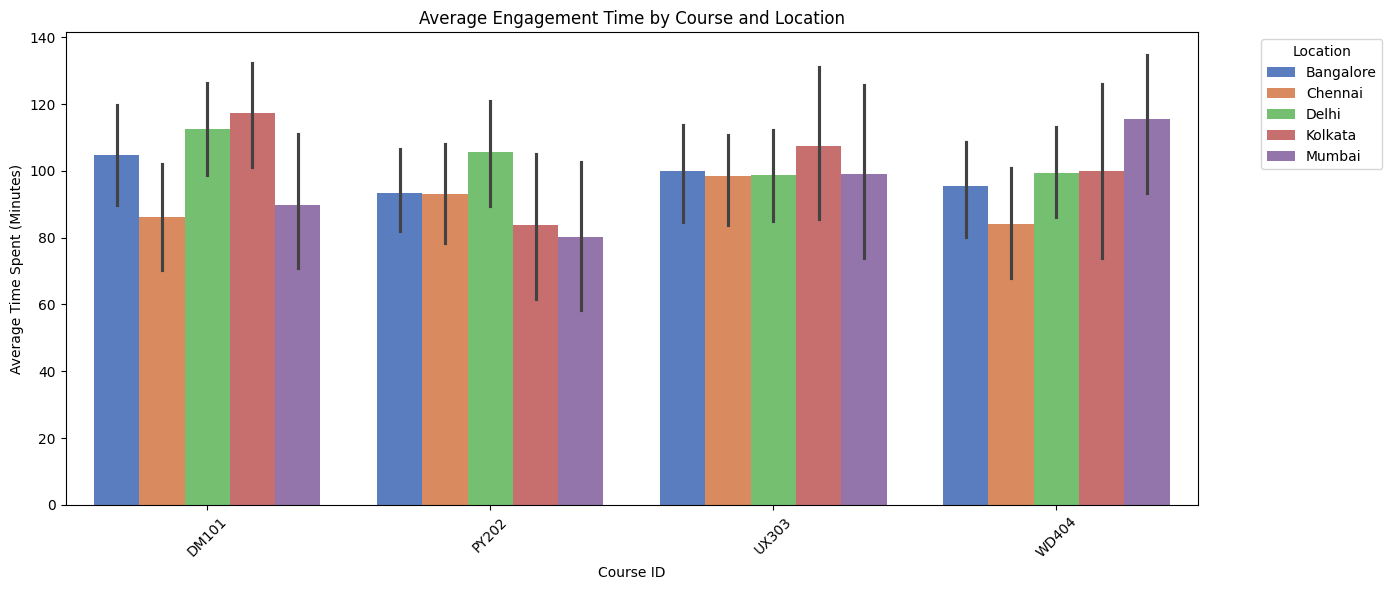

In [467]:
plt.figure(figsize=(14,6))
sns.barplot(data=merged_df, x='Course_ID', y='Time_Spent_Minutes', hue='Location',
            estimator='mean', palette='muted')
plt.title("Average Engagement Time by Course and Location")
plt.xlabel("Course ID")
plt.ylabel("Average Time Spent (Minutes)")
plt.legend(title="Location", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("my_plot_4.png", bbox_inches='tight')
plt.show()


### V.5  Scatter plot: Completion % vs Time Spent


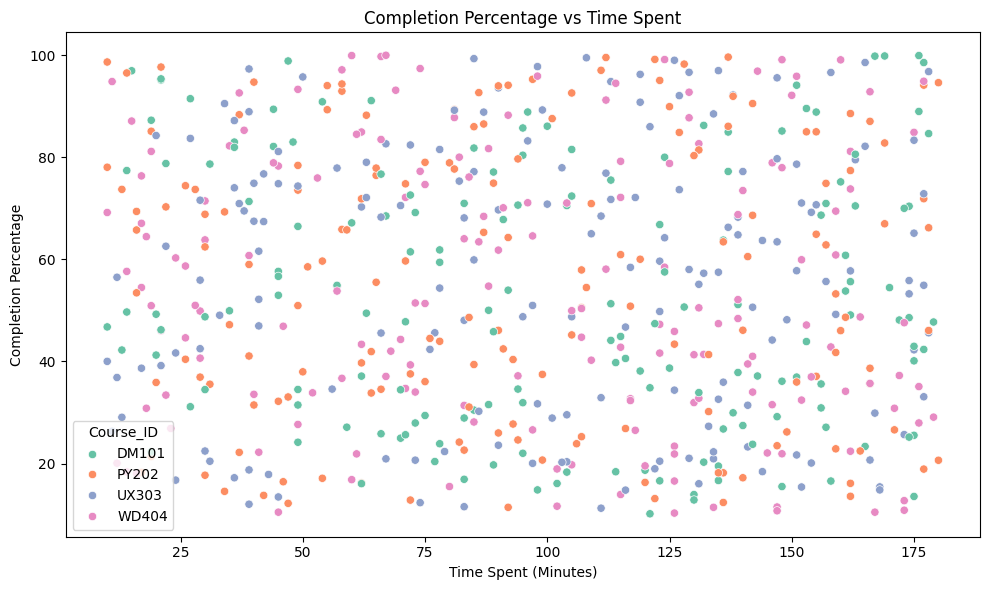

In [469]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='Time_Spent_Minutes', y='Completion_Percentage', hue='Course_ID', palette='Set2')
plt.title("Completion Percentage vs Time Spent")
plt.xlabel("Time Spent (Minutes)")
plt.ylabel("Completion Percentage")
plt.tight_layout()
plt.savefig("my_plot_5.png", bbox_inches='tight')
plt.show()

### V.6 Heatmap: Correlation Matrix

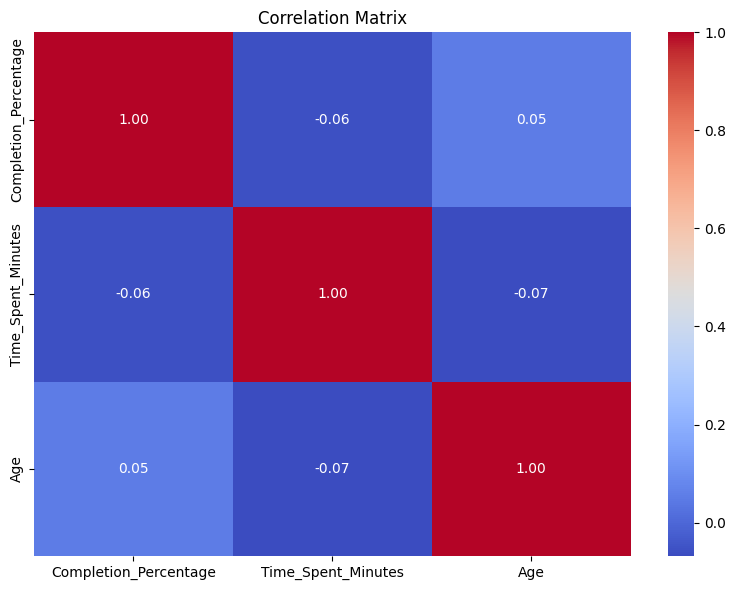

In [471]:
plt.figure(figsize=(8,6))
numeric_cols = merged_df[['Completion_Percentage', 'Time_Spent_Minutes', 'Age']].dropna()
correlation = numeric_cols.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("my_plot_6.png", bbox_inches='tight')
plt.show()


### V.7 Average Completion Rate by Age Group

C:\Users\hp\AppData\Local\Temp\ipykernel_26120\3726258995.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_completion_by_age = merged_df.groupby('Age_Group')['Completion_Percentage'].mean().reset_index()


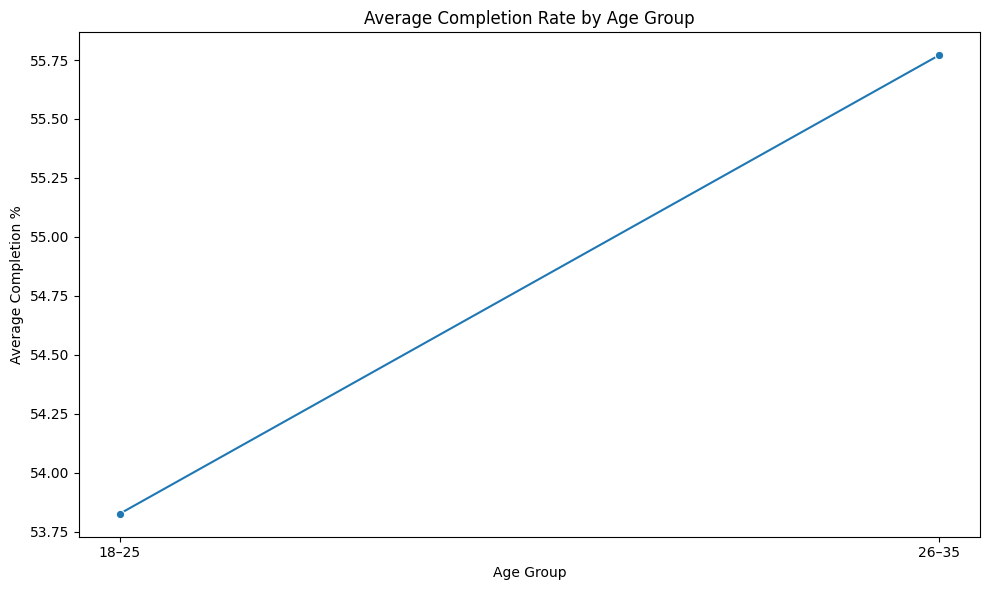

In [473]:
avg_completion_by_age = merged_df.groupby('Age_Group')['Completion_Percentage'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_completion_by_age, x='Age_Group', y='Completion_Percentage', marker='o')
plt.title("Average Completion Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Completion %")
plt.tight_layout()
plt.savefig("my_plot_7.png", bbox_inches='tight')
plt.show()

### V.8  Average Rating per Course

C:\Users\hp\AppData\Local\Temp\ipykernel_26120\3994918635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feedback_df, x='Course_ID', y='Rating', estimator='mean', palette='coolwarm')


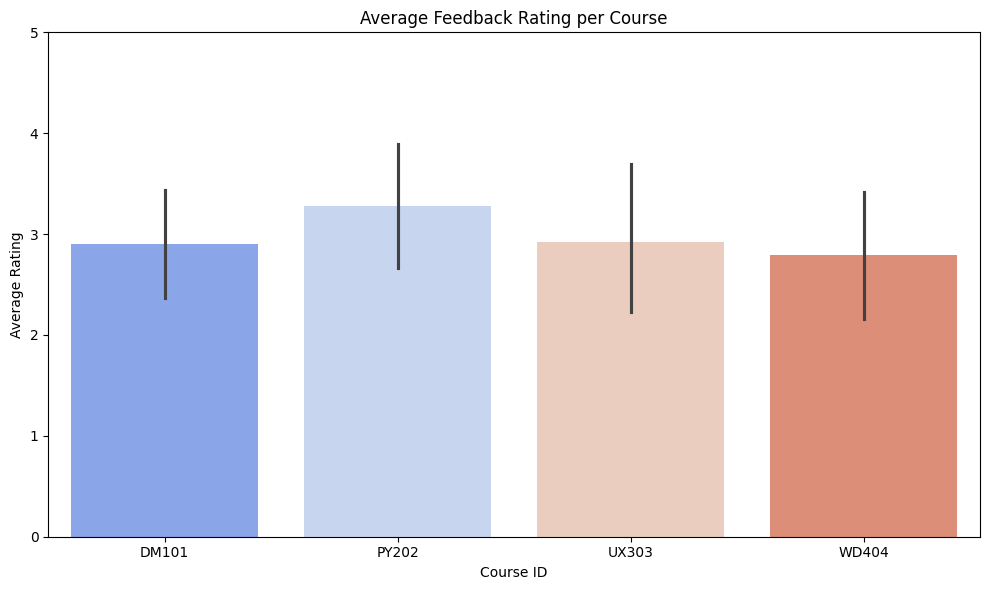

In [475]:
plt.figure(figsize=(10,6))
sns.barplot(data=feedback_df, x='Course_ID', y='Rating', estimator='mean', palette='coolwarm')
plt.title("Average Feedback Rating per Course")
plt.xlabel("Course ID")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.tight_layout()
plt.savefig("my_plot_8.png", bbox_inches='tight')
plt.show()


### V.9  Distribution of Ratings by Course

C:\Users\hp\AppData\Local\Temp\ipykernel_26120\3667108862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=feedback_df, x='Course_ID', y='Rating', palette='pastel')


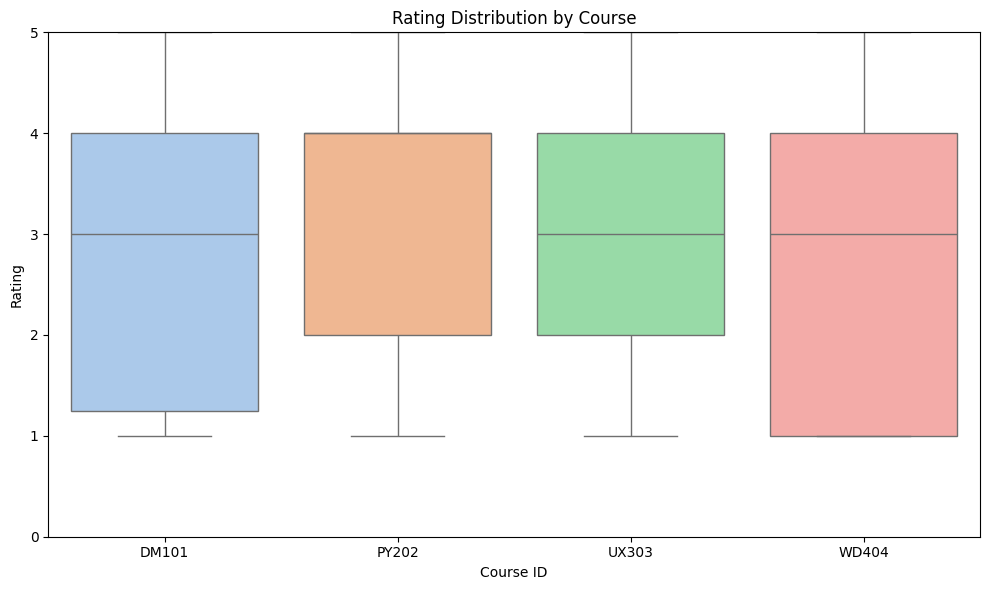

In [477]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=feedback_df, x='Course_ID', y='Rating', palette='pastel')
plt.title("Rating Distribution by Course")
plt.xlabel("Course ID")
plt.ylabel("Rating")
plt.ylim(0, 5)
plt.tight_layout()
plt.savefig("my_plot_9.png", bbox_inches='tight')
plt.show()


### V.10 Average Rating by Location

C:\Users\hp\AppData\Local\Temp\ipykernel_26120\1944539277.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_feedback, x='Location', y='Rating', estimator='mean', palette='Set2')


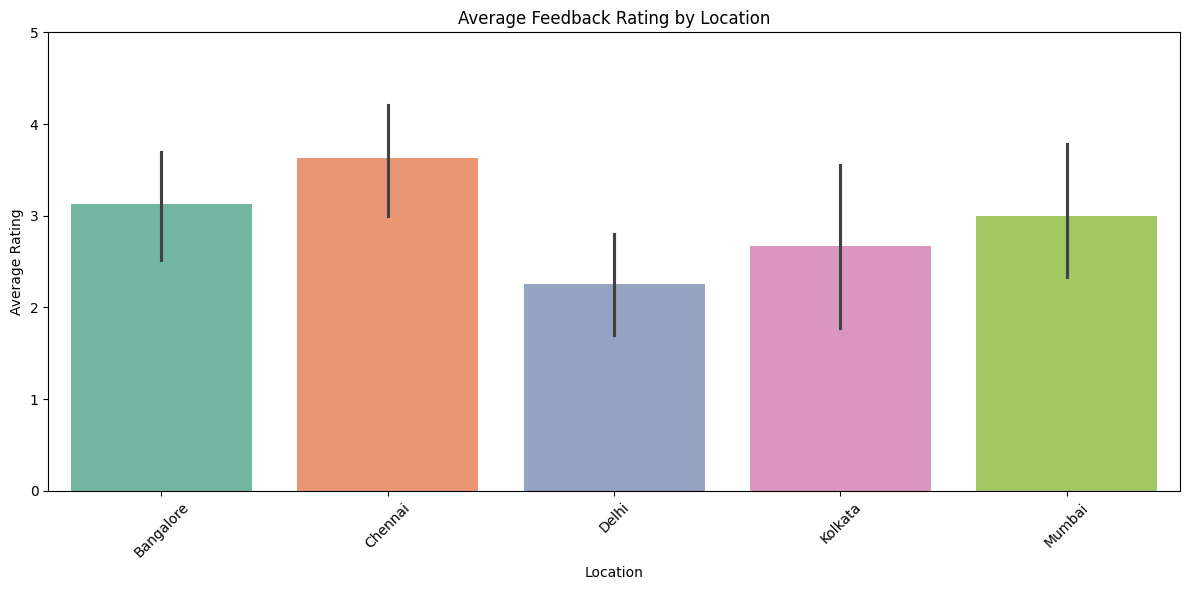

In [479]:
merged_feedback = pd.merge(feedback_df,student_df[['Student_ID', 'Location']], on='Student_ID', how='left')

plt.figure(figsize=(12,6))
sns.barplot(data=merged_feedback, x='Location', y='Rating', estimator='mean', palette='Set2')
plt.title("Average Feedback Rating by Location")
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("my_plot_10.png", bbox_inches='tight')
plt.show()


### V.11 Average Rating by Course and Location

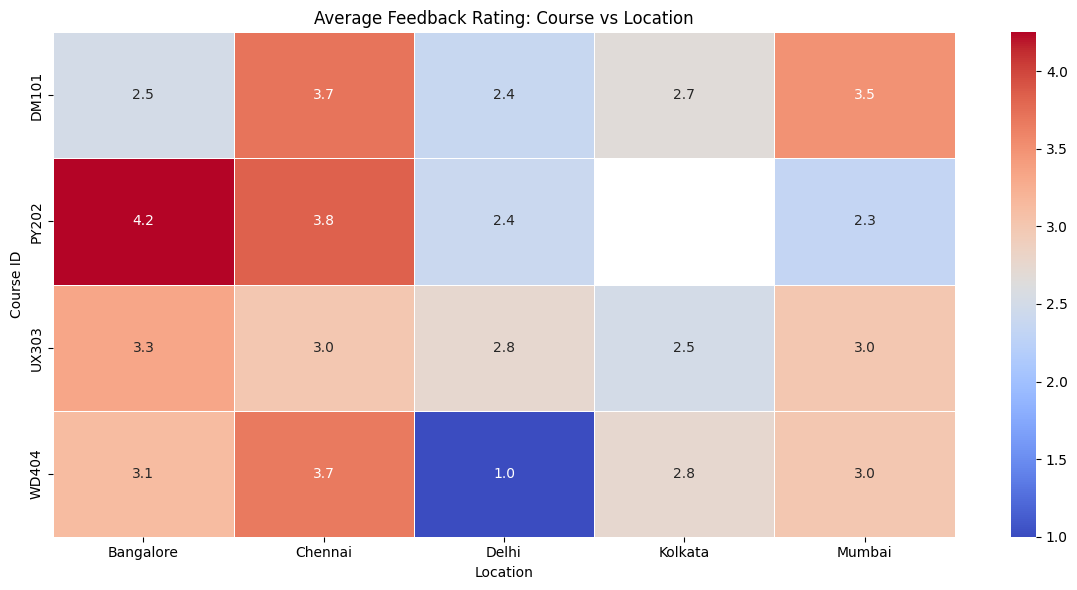

In [481]:
pivot_table = merged_feedback.pivot_table(
    index='Course_ID',
    columns='Location',
    values='Rating',
    aggfunc='mean',
    observed=False)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title("Average Feedback Rating: Course vs Location")
plt.xlabel("Location")
plt.ylabel("Course ID")
plt.tight_layout()
plt.savefig("my_plot_11.png", bbox_inches='tight')
plt.show()

In [734]:
student_df['Enroll_Month'] = student_df['Enrolment_Date'].dt.to_period('M')
course_df['Activity_Month'] = course_df['Date'].dt.to_period('M')


### V.12 Monthly Enrollments Over Time

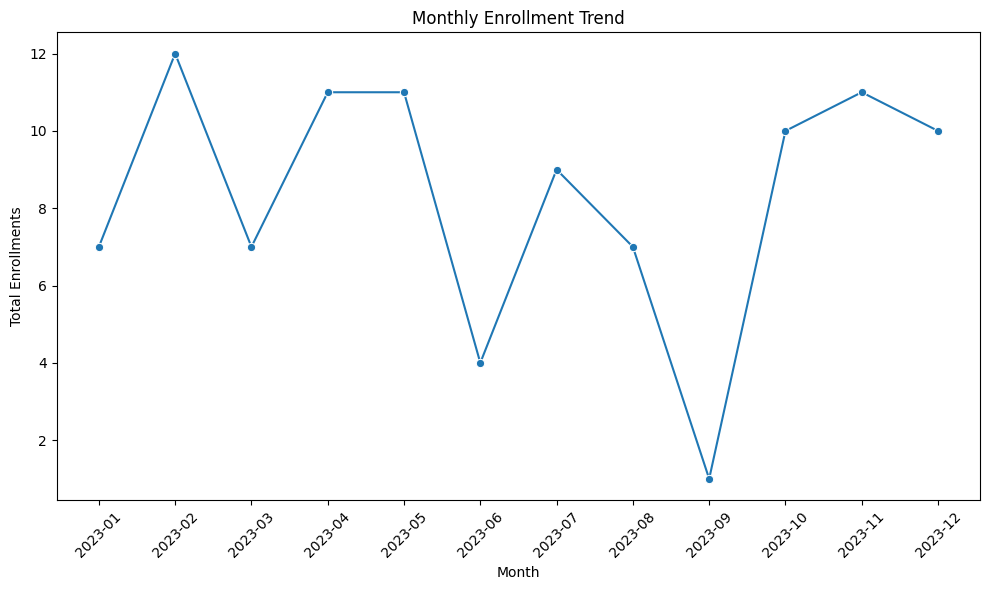

In [737]:
enroll_trend =student_df.groupby('Enroll_Month').size().reset_index(name='Total_Enrollments')
enroll_trend['Enroll_Month'] = enroll_trend['Enroll_Month'].astype(str)

plt.figure(figsize=(10,6))
sns.lineplot(data=enroll_trend, x='Enroll_Month', y='Total_Enrollments', marker='o')
plt.title("Monthly Enrollment Trend")
plt.xlabel("Month")
plt.ylabel("Total Enrollments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("my_plot_12.png", bbox_inches='tight')
plt.show()


### V.13  Average Completion Rate Over Time

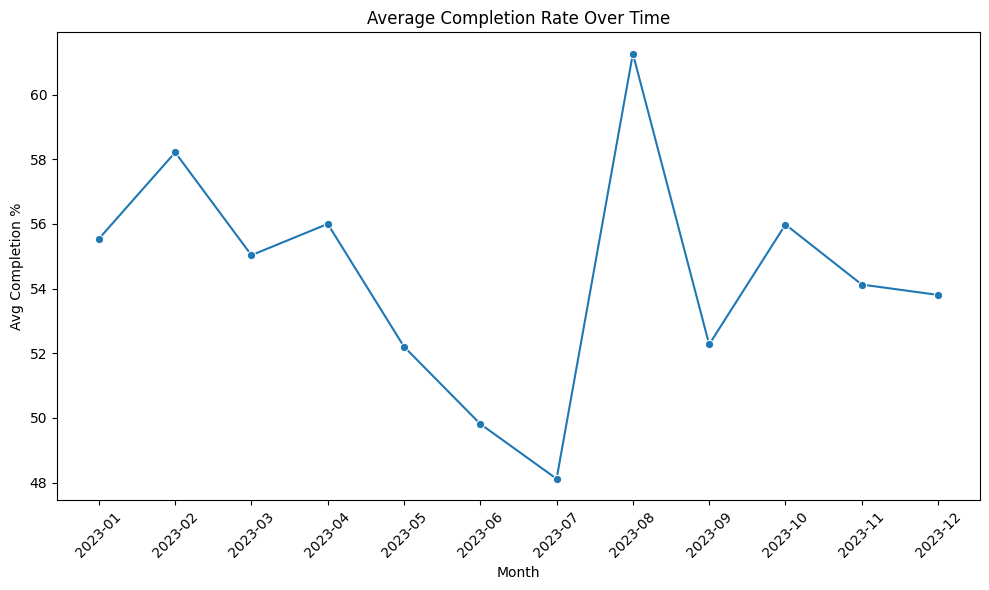

In [740]:
# Merge first if needed
merged_df['Activity_Month'] = pd.to_datetime(merged_df['Enrolment_Date'], errors='coerce').dt.to_period('M')
completion_trend = merged_df.groupby('Activity_Month')['Completion_Percentage'].mean().reset_index()
completion_trend['Activity_Month'] = completion_trend['Activity_Month'].astype(str)

plt.figure(figsize=(10,6))
sns.lineplot(data=completion_trend, x='Activity_Month', y='Completion_Percentage', marker='o')
plt.title("Average Completion Rate Over Time")
plt.xlabel("Month")
plt.ylabel("Avg Completion %")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("my_plot_13.png", bbox_inches='tight')
plt.show()


In [744]:
# Save student data
student_df.to_csv('cleaned_student_data.csv', index=False)

# Save course data
course_df.to_csv('cleaned_course_data.csv', index=False)

# Save feedback data
feedback_df.to_csv('cleaned_feedback_data.csv', index=False)
